In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#converting the species column to label
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


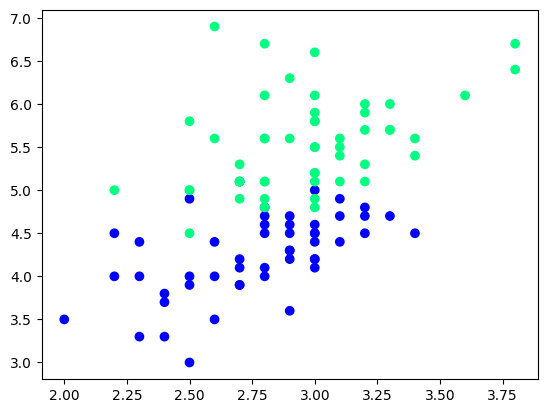

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [7]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [8]:
df_train

,sepal_width,petal_length,species
63,2.9,4.7,1
125,3.2,6.0,2
112,3.0,5.5,2
83,2.7,5.1,1
52,3.1,4.9,1
107,2.9,6.3,2
109,3.6,6.1,2
142,2.7,5.1,2
121,2.8,4.9,2
147,3.0,5.2,2


In [9]:
df_val

,sepal_width,petal_length,species
102,3.0,5.9,2
103,2.9,5.6,2
119,2.2,5.0,2
133,2.8,5.1,2
106,2.5,4.5,2


In [10]:
df_test

,sepal_width,petal_length,species
72,2.5,4.9,1
64,2.9,3.6,1
96,2.9,4.2,1
144,3.3,5.7,2
123,2.7,4.9,2


In [11]:
#making X_test and y_test
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [12]:
X_test

array([[3. , 5.9],
       [2.9, 5.6],
       [2.2, 5. ],
       [2.8, 5.1],
       [2.5, 4.5]])

In [13]:
y_test

array([2, 2, 2, 2, 2])

In [14]:
#Now giving data to diffrent decision tree 
#80 % of whole data will be given 

# Data for Tree 1
df_bag = df_train.sample(8,replace=True) #replace true means rows can be repeated

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
147,3.0,5.2,2
147,3.0,5.2,2
83,2.7,5.1,1
52,3.1,4.9,1
83,2.7,5.1,1
125,3.2,6.0,2
52,3.1,4.9,1
109,3.6,6.1,2


In [15]:
X

,sepal_width,petal_length
147,3.0,5.2
147,3.0,5.2
83,2.7,5.1
52,3.1,4.9
83,2.7,5.1
125,3.2,6.0
52,3.1,4.9
109,3.6,6.1


In [16]:
y

147    2
147    2
83     1
52     1
83     1
125    2
52     1
109    2
Name: species, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()


In [18]:
#creating a function for full training process

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

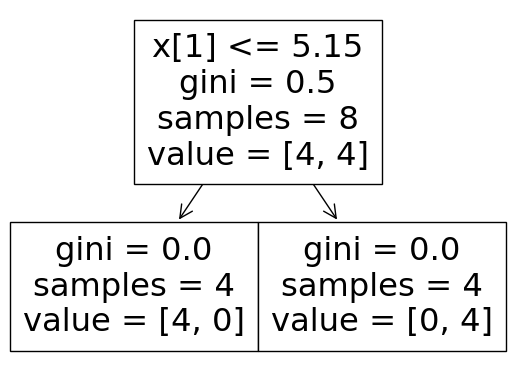

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


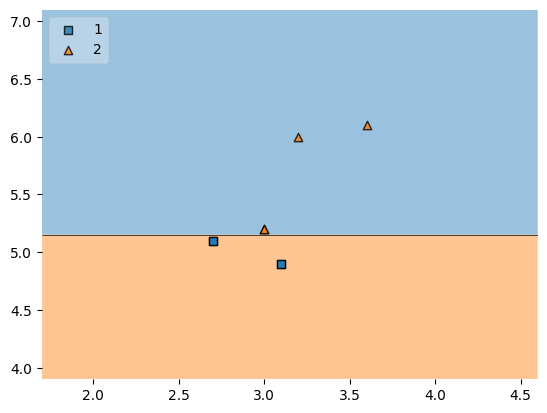

In [19]:
evaluate(dt_bag1,X,y)

In [20]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
109,3.6,6.1,2
109,3.6,6.1,2
125,3.2,6.0,2
121,2.8,4.9,2
83,2.7,5.1,1
125,3.2,6.0,2
109,3.6,6.1,2
121,2.8,4.9,2


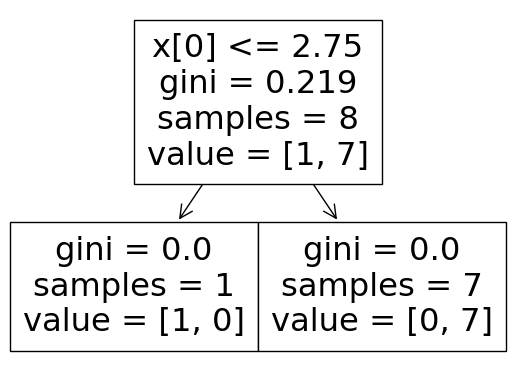

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


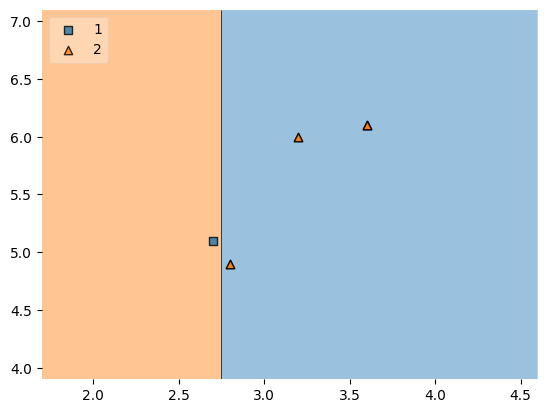

In [21]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [22]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
121,2.8,4.9,2
125,3.2,6.0,2
52,3.1,4.9,1
142,2.7,5.1,2
142,2.7,5.1,2
83,2.7,5.1,1
121,2.8,4.9,2
52,3.1,4.9,1


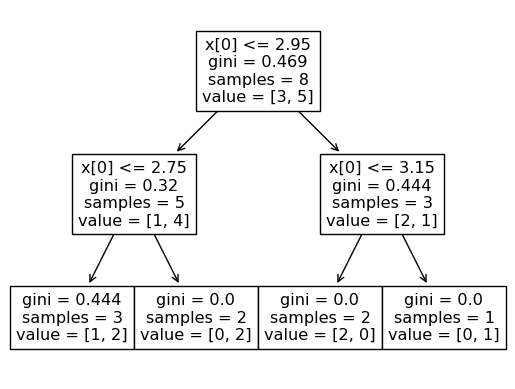

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


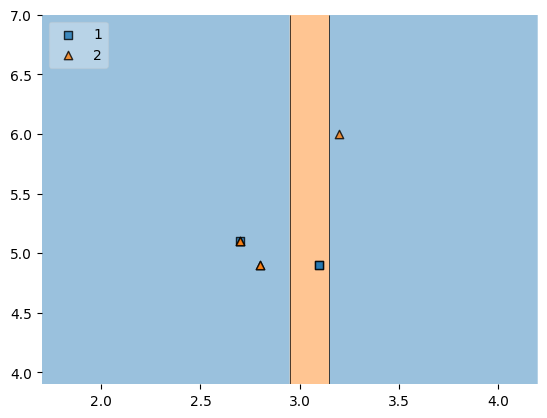

In [23]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [24]:
df_test


,sepal_width,petal_length,species
72,2.5,4.9,1
64,2.9,3.6,1
96,2.9,4.2,1
144,3.3,5.7,2
123,2.7,4.9,2


In [28]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,3.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,3.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,3.6]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
#There are types of sampling in bagging row and column here we have used row one



# Pasting

In [31]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
63,2.9,4.7,1
125,3.2,6.0,2
112,3.0,5.5,2
83,2.7,5.1,1
52,3.1,4.9,1
107,2.9,6.3,2
109,3.6,6.1,2
142,2.7,5.1,2
121,2.8,4.9,2
147,3.0,5.2,2


In [33]:
df_train.sample(8) #here 'replacement = false' no repeat of rows

,sepal_width,petal_length,species
109,3.6,6.1,2
107,2.9,6.3,2
121,2.8,4.9,2
147,3.0,5.2,2
112,3.0,5.5,2
63,2.9,4.7,1
142,2.7,5.1,2
83,2.7,5.1,1


# Random Subspacing

In [35]:
df1 = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df1 = df1.sample(10)


In [36]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica
113,5.7,2.5,5.0,2.0,virginica
114,5.8,2.8,5.1,2.4,virginica
122,7.7,2.8,6.7,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
12,4.8,3.0,1.4,0.1,setosa
77,6.7,3.0,5.0,1.7,versicolor
67,5.8,2.7,4.1,1.0,versicolor


In [38]:
df1.sample(2,replace=True,axis=1)


,species,petal_width
148,virginica,2.3
109,virginica,2.5
144,virginica,2.5
113,virginica,2.0
114,virginica,2.4
122,virginica,2.0
146,virginica,1.9
12,setosa,0.1
77,versicolor,1.7
67,versicolor,1.0


# Random Patches

In [39]:
#here we perform row and column sampling both

df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,sepal_width,petal_width
109,3.6,2.5
146,2.5,1.9
114,2.8,2.4
109,3.6,2.5
77,3.0,1.7
109,3.6,2.5
114,2.8,2.4
114,2.8,2.4


In [40]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,species,petal_width
148,virginica,2.3
67,versicolor,1.0
148,virginica,2.3
113,virginica,2.0
144,virginica,2.5
114,virginica,2.4
114,virginica,2.4
122,virginica,2.0
